# Giriş

- Öneri/ Tavsiye Sistemleri nedir? Ne işe yarar? : Uygulama/site kullanıcılarının ilgi alanlarına göre, sonraki hareketlerini tahmin ederek uygulama kullanımını sürdürmek amacıyla düzenlenen algoritma yapılarıdır. Öneri motorları, tüketicilerin seçimlerini öğrenerek modeller oluşturur ve onların ihtiyaçları ve ilgileriyle ilişkili sonuçlar üretir. Uygulanacak yöntemler basitçe, kişinin önceki hareketlerine göre ya da benzer kişilerin hareketlerinden yola çıkılarak düzenlenebilir.

- Öneri Sistemlerinin Faydaları : Kişiselleştirme – Kullanıcılara özel tahminlerde bulunulması sebebiyle, kişiselleştirilmiş bir deneyim sunulur. Kişileri kullanıma yönlendirmesi sebebiyle iyi sonuçlar verir. Gelir- Doğru kullanıldığında, uygulamalar iyi bir trafik ve gelir kaynağı olabilir.Müşteri memnuniyeti – Doğru öneriler ile kişiler kullanıma yönlendirilir ve kişinin belki de hiç keşfedemeyeceği ürünler sunulmuş olur.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv
/kaggle/input/movielens-20m-dataset/rating.csv
/kaggle/input/movielens-20m-dataset/link.csv
/kaggle/input/movielens-20m-dataset/genome_tags.csv
/kaggle/input/movielens-20m-dataset/genome_scores.csv
/kaggle/input/movielens-20m-dataset/tag.csv
/kaggle/input/movielens-20m-dataset/movie.csv


In [2]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

# Demographic Filtering
- Film popülerliğine ve/veya türüne göre her kullanıcıya genelleştirilmiş öneriler sunarlar. Sistem, benzer demografik özelliklere sahip kullanıcılara aynı filmleri önerir. Her kullanıcı farklı olduğundan, bu yaklaşım çok basit olarak kabul edilir. Bu sistemin arkasındaki temel fikir, daha popüler ve eleştirmenlerce beğenilen filmlerin ortalama izleyici tarafından beğenilme olasılığının daha yüksek olacağıdır.

- Filmin ortalama reytinglerini puan olarak kullanabiliriz ama bunu kullanmak yeterince adil olmayacaktır çünkü ortalama reytingi 8,9 olan ve sadece 3 oy alan bir film, ortalama reytingi 7,8 olan ancak 40 oy alan filmden daha iyi kabul edilemez. Bu yüzden, IMDB'nin şu şekilde verilen ağırlıklı derecelendirmesini (wr) kullandık: 

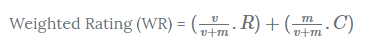

    • v, film için oy sayısıdır
    • m, tabloda listelenmek için gereken minimum oy sayısıdır
    • R, filmin ortalama puanıdır
    • C, raporun tamamındaki ortalama oydur
    
- Toplam oy sayısı(v) ve filmin ortalaması bizde hali hazırda var. 'v' değeri için 'No_of_Votes' sütununu kullanıcağız. 'R' değeri için 'IMDB_Rating' sütununu kullanıcağız.

- 'C' değerini bulmak için;

In [5]:
C= df['IMDB_Rating'].mean()
C

7.949299999999999

- 'm' değeri için minimum noktayı %90 belirledik. Yani bir filmin listelerde yer alabilmesi için listedeki filmlerin en az %90'ından fazla oy alması gerekiyor.

- 'm' için;

In [6]:
m= df['No_of_Votes'].quantile(0.9)
m

699297.7

- Listeye uygun filmleri filtrelemek için;

In [7]:
movies = df.copy().loc[df['No_of_Votes'] >= m]
movies.shape

(100, 16)

- Bu listeye giren 100 tane film var. Her nitelikli film için hesaplama yapacağız.

In [8]:
def weighted_rating(x, m=m, C=C):
    v = x['No_of_Votes']
    R = x['IMDB_Rating']
    # IMDB formülüne göre hesaplama
    return (v/(v+m) * R) + (m/(m+v) * C)

- Yeni bir puan değeri hesaplanması.

In [9]:
movies['score'] = movies.apply(weighted_rating, axis=1)

- 'score' özelliğine göre ilk o filmin yazdırılması.

In [10]:
movies = movies.sort_values('score', ascending=False)
movies[['Series_Title', 'No_of_Votes', 'IMDB_Rating', 'score']].head(10)

,Series_Title,No_of_Votes,IMDB_Rating,score
0,The Shawshank Redemption,2343110,9.3,8.989541
1,The Godfather,1620367,9.2,8.822958
2,The Dark Knight,2303232,9.0,8.755289
6,Pulp Fiction,1826188,8.9,8.636755
5,The Lord of the Rings: The Return of the King,1642758,8.9,8.616137
3,The Godfather: Part II,1129952,9.0,8.598331
8,Inception,2067042,8.8,8.584953
9,Fight Club,1854740,8.8,8.567078
11,Forrest Gump,1809221,8.8,8.562851
7,Schindler's List,1213505,8.9,8.552435


# Content Based Filtering
- Bu filtreleme yöntemi, bir filmin açıklamasına ve kullanıcının tercih ettiği seçeneklerin içeriğine dayanmaktadır. İçerik tabanlı bir öneri sisteminde, anahtar kelimeler ürünü tanımlamak için kullanılmaktadır. Algoritmalar, bir kullanıcının geçmişte beğendiklerine benzer filmleri önermeye çalışır. İçeriğe Dayalı Filtreleme fikri, bir filmi beğendiyseniz bu filme benzer başka bir film de beğeneceğinize dayanmaktadır.
- Konu açıklamalarına göre tüm filmler için ikili benzerlik puanlarını hesaplayacağız ve bu benzerlik puanına göre filmler önereceğiz. 

In [11]:
df['Overview'].head()

0    Two imprisoned men bond over a number of years...
1    An organized crime dynasty's aging patriarch t...
2    When the menace known as the Joker wreaks havo...
3    The early life and career of Vito Corleone in ...
4    A jury holdout attempts to prevent a miscarria...
Name: Overview, dtype: object

 - Her 'overview' için Terim Frekansı-Ters Belge Frekansı (TF-IDF) vektörlerini hesaplayacağız.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF vektörünü daha sağlıklı hesaplamak için 'a' ve 'the' sözcüklerini kaldırıyoruz.
tfidf = TfidfVectorizer(stop_words='english')

#NaN değerini boş bir dizeyle değiştiriyoruz
df['Overview'] = df['Overview'].fillna('')

#TF-IDF matrisinin oluşturulması
tfidf_matrix = tfidf.fit_transform(df['Overview'])

tfidf_matrix.shape

(1000, 5426)

- Veri setimizde bulunan 1000 filmi tanımlamak için 5426 tane farklı kelime kullanılmıştır.
- Büyüklükten bağımsız olduğu ve hesaplaması nispeten kolay ve hızlı olduğu için kosinüs benzerlik skorunu kullanıyoruz.
- TF-IDF vektörleştiricisini kullandığımız için, iç çarpımı hesaplamak bize doğrudan kosinüs benzerlik puanını verecektir. Bu nedenle, daha hızlı olduğu için cosine_similarities() yerine sklearn'ün linear_kernel() işlevini kullanacağız.

- Kosinüs benzerlik puanına göre ;

In [13]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [14]:
indices = pd.Series(df.index, index=df['Series_Title']).drop_duplicates()

In [15]:
# Film başlığını girdi olarak alıcak ve benzer filmleri döndürecek
def recommendations(series_title, cosine_sim=cosine_sim):
    
    # Başlıkla eşleşen filmin indeksi alınır
    idx = indices[series_title]

    # Benzerlik puanı alınır
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Benzerlik puanına göre sıralanma
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # En benzer 10 filmin puanı alınır
    sim_scores = sim_scores[1:11]

    # Film indekleri alınır
    movie_indices = [i[0] for i in sim_scores]

    # İlk 10 film döndürülür
    return df['Series_Title'].iloc[movie_indices]

In [16]:
recommendations('The Godfather')

463                             Knives Out
974                The Godfather: Part III
739                               Nebraska
628    The Curious Case of Benjamin Button
913                              Die Welle
184                        Smultronstället
543                         The Wild Bunch
442                The Night of the Hunter
3                   The Godfather: Part II
618      The Hobbit: An Unexpected Journey
Name: Series_Title, dtype: object

# Collaborative Filtering
- Bu filtreleme yöntemi genellikle kullanıcının davranışları, etkinlikleri veya tercihleri hakkında bilgi toplamaya, analiz etmeye ve diğer kullanıcılarla olan benzerliğini temel alarak neleri seveceklerini tahmin etmeye dayanmaktadır. En önemli avantajlarından biri analiz için içeriğe ihtiyaç duymaması ve bu nedenle nesnenin kendisini anlamasını gerektirmeden karmaşık öğeleri doğru bir şekilde önerebilmesidir. İşbirliğine Dayalı Filtreleme, geçmişte benzer tercihlere sahip olan bireylerin gelecekte aynı tercihleri yapacakları varsayımına dayanmaktadır.
- Kullanıcıya göre öneri yapabilmemiz için 'userId' değerine ihtiyacımız var ve bu nedenle ikinci data setini proje ekliyoruz.
- User based filtering : Bu sistemler, benzer kullanıcıların beğendiği ürünleri bir kullanıcıya önerir.İki kullanıcı arasındaki benzerliği ölçmek için pearson korelasyonu veya kosinüs benzerliği kullanabiliriz.Kullanıcı tabanlı CF'yi hesaplamak çok basit olmasına rağmen, birkaç sorundan muzdariptir. Ana sorunlardan biri, kullanıcıların tercihinin zaman içinde değişebilmesidir. Komşu kullanıcılara göre matrisin önceden hesaplanmasının kötü performansa yol açabileceğini gösterir.
- Item Based Collaborative Filtering : Hedef kullanıcının derecelendirdiği öğelerle benzerliklerine göre öğeler önerir.Benzerlik, Pearson Korelasyonu veya Kosinüs Benzerliği ile hesaplanabilir.Statik olduğundan, dinamik kullanıcı tercihinin ortaya çıkardığı sorunu başarıyla önler.Ancak, bu yöntem için birkaç sorun devam etmektedir. İlk olarak, ana konu ölçeklenebilirliktir. Hesaplama hem müşteri hem de ürünle birlikte büyür. En kötü durum karmaşıklığı, m kullanıcı ve n öğe ile O(mn)'dir. Ek olarak, seyreklik başka bir endişe kaynağıdır. Aşırı durumlarda, milyonlarca kullanıcımız olabilir ve oldukça farklı iki film arasındaki benzerlik, yalnızca benzer sıralamaya sahip oldukları için çok yüksek olabilir. 

### Single Value Decomposition (SVD)
- CF tarafından oluşturulan ölçeklenebilirlik ve seyreklik sorununu halletmenin bir yolu, kullanıcılar ve öğeler arasındaki benzerliği yakalamak için bir gizli faktör modelinden yararlanmaktır. Esasen öneri problemini bir optimizasyon problemine dönüştürmek istiyoruz. Bir kullanıcıya verilen öğeler için derecelendirmeyi tahmin etmede ne kadar iyi olduğumuz olarak görebiliriz. Yaygın bir ölçüm, Kök Ortalama Kare Hatasıdır (RMSE). RMSE ne kadar düşükse performans o kadar iyidir.
- SVD, gizli faktörlerini çıkararak fayda matrisinin boyutunu azaltır. Temel olarak, her bir kullanıcıyı ve her bir öğeyi r boyutuna sahip gizli bir uzaya eşleriz. Bu nedenle, doğrudan karşılaştırılabilir hale geldikçe, kullanıcılar ve öğeler arasındaki ilişkiyi daha iyi anlamamıza yardımcı olur.

In [17]:
ratings = pd.read_csv('/kaggle/input/movielens-20m-dataset/rating.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [18]:
ratings=ratings.iloc[0:1000]
ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
995,11,441,1.5,2009-01-01 23:52:42
996,11,442,4.5,2009-01-01 05:33:22
997,11,480,5.0,2009-01-01 05:45:13
998,11,500,4.5,2009-01-02 01:15:49


In [19]:
from surprise import Reader
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
reader = Reader()

In [20]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

svd = SVD()

# 10 kat çapraz doğrulama (cross-validation)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9251  0.9519  0.8615  0.8283  0.8581  0.6595  0.9442  0.8842  0.8401  0.8119  0.8565  0.0801  
MAE (testset)     0.6712  0.7613  0.6769  0.6292  0.6703  0.5238  0.6912  0.7165  0.6780  0.6732  0.6691  0.0584  
Fit time          0.06    0.06    0.06    0.06    0.06    0.06    0.06    0.06    0.06    0.06    0.06    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.92505538, 0.9519223 , 0.86148151, 0.82828228, 0.85813828,
        0.6595245 , 0.94421958, 0.88420098, 0.84009254, 0.81188193]),
 'test_mae': array([0.67116495, 0.76125033, 0.67689428, 0.6292394 , 0.6702914 ,
        0.52379523, 0.69124157, 0.71645619, 0.6779786 , 0.6731549 ]),
 'fit_time': (0.06130790710449219,
  0.05966663360595703,
  0.059575557708740234,
  0.05988192558288574,
  0.05951094627380371,
  0.05962514877319336,
  0.06001162528991699,
  0.059328317642211914,
  0.05912041664123535,
  0.05894875526428223),
 'test_time': (0.0007846355438232422,
  0.0007140636444091797,
  0.0007264614105224609,
  0.0007338523864746094,
  0.0007176399230957031,
  0.0007240772247314453,
  0.0007252693176269531,
  0.0007243156433105469,
  0.0007128715515136719,
  0.0007195472717285156)}

- Yaklaşık 0.86 'Kök Ortalama Kare Hatası (RMSE)' 

### Eğitim ve Tahmin

In [21]:
trainset = data.build_full_trainset()
svd.fit(trainset)

- userId = 1 için verdiği puanlar;

In [22]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
170,1,8507,5.0,2004-09-10 03:13:47
171,1,8636,4.5,2005-04-02 23:44:53
172,1,8690,3.5,2005-04-02 23:33:15
173,1,8961,4.0,2005-04-02 23:47:09


#### Tahmin;

In [23]:
svd.predict(1, 300, 3)

Prediction(uid=1, iid=300, r_ui=3, est=3.7300430417133774, details={'was_impossible': False})

In [24]:
svd.predict(1, 500, 3)

Prediction(uid=1, iid=500, r_ui=3, est=4.006787355741468, details={'was_impossible': False})

In [25]:
svd.predict(1, 480, 3)

Prediction(uid=1, iid=480, r_ui=3, est=4.152236607384151, details={'was_impossible': False})

- Kimliği 300 olan film için tahmini olarak 3.736 tahmini alıyoruz. 
- Kimliği 500 olan film için tahmini olarak 3.932 tahmini alıyoruz. 
- Kimliği 480 olan film için tahmini olarak 4.017 tahmini alıyoruz. 


- Bu tavsiye sistemi, filmin ne olduğu (veya ne içerdiği) ile ilgilenmemektedir. Yalnızca atanmış bir film kimliği temelinde çalışır ve diğer kullanıcıların filmi nasıl tahmin ettiğine bağlı olarak derecelendirmeleri tahmin etmeye çalışır.